In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from scipy.stats import itemfreq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import pyLDAvis
import pyLDAvis.sklearn

In [2]:
df=pd.read_csv("all-data.csv", encoding='Windows-1252')
df.head(5)

,sentiment,headlines
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4846 non-null   object
 1   headlines  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<AxesSubplot:>

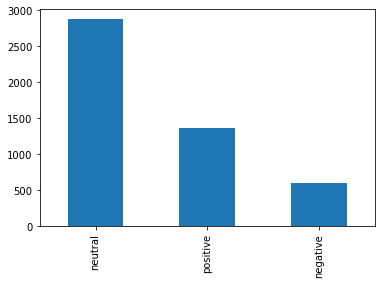

In [4]:
df['sentiment'].value_counts().plot(kind='bar')

In [5]:
neutral = df.loc[df['sentiment'] == 'neutral']
neutral.head()

,sentiment,headlines
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
58,neutral,At the request of Finnish media company Alma M...
59,neutral,"In Sweden , Gallerix accumulated SEK denominat..."
60,neutral,The company supports its global customers in d...


In [6]:
pos = df.loc[df['sentiment'] == 'positive']
pos.head()
neg = df.loc[df['sentiment'] == 'negative']
neg.head()

,sentiment,headlines
2,negative,The international electronic industry company ...
415,negative,A tinyurl link takes users to a scamming site ...
421,negative,"Compared with the FTSE 100 index , which rose ..."
423,negative,"Compared with the FTSE 100 index , which rose ..."
500,negative,One of the challenges in the oil production in...


In [7]:
neutral  = shuffle(neutral)
pos  = shuffle(pos)
neg  = shuffle(neg)

In [8]:
neutral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2879 entries, 2961 to 2919
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  2879 non-null   object
 1   headlines  2879 non-null   object
dtypes: object(2)
memory usage: 67.5+ KB


In [9]:
newDf = neutral[:500]
newDf = newDf.append(pos[:500])
newDf = newDf.append(neg[:500])

In [10]:
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 2961 to 4747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   headlines  1500 non-null   object
dtypes: object(2)
memory usage: 35.2+ KB


<AxesSubplot:>

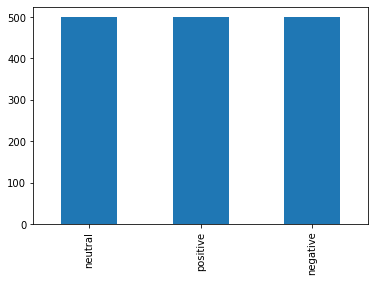

In [11]:
newDf['sentiment'].value_counts().plot(kind='bar')

In [12]:
X = newDf['headlines'].values
sentiment = newDf['sentiment'].values

In [13]:
X_train, X_test, train_sentiment, test_sentiment = train_test_split(X, sentiment, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, train_sentiment.shape, test_sentiment.shape)

(1050,) (450,) (1050,) (450,)


In [14]:
unique, counts = np.unique(train_sentiment, return_counts=True)
print("Train Dataset Breakdown")
print(np.asarray((unique, counts)))
unique2, counts2 = np.unique(test_sentiment, return_counts=True)
print("Test Dataset Breakdown")
print(np.asarray((unique2, counts2)))

Train Dataset Breakdown
[['negative' 'neutral' 'positive']
 [343 354 353]]
Test Dataset Breakdown
[['negative' 'neutral' 'positive']
 [157 146 147]]


In [15]:
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

X_train_vec_bool = unigram_bool_vectorizer.fit_transform(X_train)
X_test_vec_bool = unigram_bool_vectorizer.transform(X_test)

bnb_clf_sentiment = BernoulliNB()
bnb_clf_sentiment.fit(X_train_vec_bool, train_sentiment)
print(bnb_clf_sentiment.score(X_test_vec_bool, test_sentiment))

target_names = ['neutral', 'positive', 'negative']

bnbPred_sentiment = bnb_clf_sentiment.fit(X_train_vec_bool, train_sentiment).predict(X_test_vec_bool)
print(classification_report(test_sentiment, bnbPred_sentiment, target_names=target_names))

0.6044444444444445
              precision    recall  f1-score   support

     neutral       0.70      0.62      0.66       157
    positive       0.52      0.85      0.64       146
    negative       0.70      0.34      0.46       147

    accuracy                           0.60       450
   macro avg       0.64      0.60      0.59       450
weighted avg       0.64      0.60      0.59       450



In [16]:
bnb_scores = cross_val_score(bnb_clf_sentiment, X_train_vec_bool, train_sentiment, cv=10) # 10-fold cross validation
print(bnb_scores)
print(np.mean(bnb_scores))

[0.68571429 0.6        0.56190476 0.56190476 0.60952381 0.5047619
 0.51428571 0.62857143 0.62857143 0.56190476]
0.5857142857142856


In [17]:
unigram_bool_nostop_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5)

X_train_vec_bool_nostop = unigram_bool_nostop_vectorizer.fit_transform(X_train)
X_test_vec_bool_nostop = unigram_bool_nostop_vectorizer.transform(X_test)

bnb_clf_sentiment_nostop = BernoulliNB()
bnb_clf_sentiment_nostop.fit(X_train_vec_bool_nostop, train_sentiment)
print(bnb_clf_sentiment_nostop.score(X_test_vec_bool_nostop, test_sentiment))

bnbPred_sentiment2 = bnb_clf_sentiment_nostop.fit(X_train_vec_bool_nostop, train_sentiment).predict(X_test_vec_bool_nostop)
print(classification_report(test_sentiment, bnbPred_sentiment2, target_names=target_names))

0.6311111111111111
              precision    recall  f1-score   support

     neutral       0.71      0.65      0.68       157
    positive       0.55      0.88      0.68       146
    negative       0.73      0.37      0.49       147

    accuracy                           0.63       450
   macro avg       0.66      0.63      0.61       450
weighted avg       0.66      0.63      0.62       450



In [18]:
bnb_scores_nostop = cross_val_score(bnb_clf_sentiment_nostop, X_train_vec_bool_nostop, train_sentiment, cv=10) # 10-fold cross validation
print(bnb_scores_nostop)
print(np.mean(bnb_scores_nostop))

[0.7047619  0.60952381 0.57142857 0.60952381 0.6        0.52380952
 0.51428571 0.63809524 0.65714286 0.61904762]
0.6047619047619047


In [19]:
unigram_bool_10_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=10, stop_words='english')

X_train_vec_bool_10 = unigram_bool_10_vectorizer.fit_transform(X_train)
X_test_vec_bool_10 = unigram_bool_10_vectorizer.transform(X_test)

bnb_clf_sentiment_10 = BernoulliNB()
bnb_clf_sentiment_10.fit(X_train_vec_bool_10, train_sentiment)
print(bnb_clf_sentiment_10.score(X_test_vec_bool_10, test_sentiment))

bnbPred_sentiment3 = bnb_clf_sentiment_10.fit(X_train_vec_bool_10, train_sentiment).predict(X_test_vec_bool_10)
print(classification_report(test_sentiment, bnbPred_sentiment3, target_names=target_names))

0.54
              precision    recall  f1-score   support

     neutral       0.65      0.50      0.57       157
    positive       0.47      0.86      0.61       146
    negative       0.63      0.27      0.37       147

    accuracy                           0.54       450
   macro avg       0.58      0.54      0.52       450
weighted avg       0.59      0.54      0.52       450



In [20]:
bnb_scores_10 = cross_val_score(bnb_clf_sentiment_10, X_train_vec_bool_10, train_sentiment, cv=10) # 10-fold cross validation
print(bnb_scores_10)
print(np.mean(bnb_scores_10))

[0.64761905 0.59047619 0.57142857 0.48571429 0.56190476 0.44761905
 0.56190476 0.6        0.60952381 0.52380952]
0.5599999999999999


In [21]:
unigram_bool_10_vectorizer_ns = CountVectorizer(encoding='latin-1', binary=True, min_df=10)

X_train_vec_bool_10_ns = unigram_bool_10_vectorizer_ns.fit_transform(X_train)
X_test_vec_bool_10_ns = unigram_bool_10_vectorizer_ns.transform(X_test)

bnb_clf_sentiment_10_ns = BernoulliNB()
bnb_clf_sentiment_10_ns.fit(X_train_vec_bool_10_ns, train_sentiment)
print(bnb_clf_sentiment_10_ns.score(X_test_vec_bool_10_ns, test_sentiment))

bnbPred_sentiment4 = bnb_clf_sentiment_10_ns.fit(X_train_vec_bool_10_ns, train_sentiment).predict(X_test_vec_bool_10_ns)
print(classification_report(test_sentiment, bnbPred_sentiment4, target_names=target_names))

0.5733333333333334
              precision    recall  f1-score   support

     neutral       0.68      0.55      0.61       157
    positive       0.50      0.86      0.63       146
    negative       0.65      0.31      0.42       147

    accuracy                           0.57       450
   macro avg       0.61      0.57      0.55       450
weighted avg       0.61      0.57      0.55       450



In [22]:
bnb_scores_10_ns = cross_val_score(bnb_clf_sentiment_10_ns, X_train_vec_bool_10_ns, train_sentiment, cv=10) # 10-fold cross validation
print(bnb_scores_10_ns)
print(np.mean(bnb_scores_10_ns))

[0.6952381  0.61904762 0.57142857 0.56190476 0.57142857 0.47619048
 0.56190476 0.59047619 0.60952381 0.57142857]
0.5828571428571427


In [23]:
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')

X_train_vec_count = unigram_count_vectorizer.fit_transform(X_train)
X_test_vec_count = unigram_count_vectorizer.transform(X_test)

mnb_clf_sentiment = MultinomialNB()
mnb_clf_sentiment.fit(X_train_vec_count, train_sentiment)
print(mnb_clf_sentiment.score(X_test_vec_count, test_sentiment))

target_names = ['neutral', 'positive', 'negative']

mnbPred_sentiment = mnb_clf_sentiment.fit(X_train_vec_count, train_sentiment).predict(X_test_vec_count)
print(classification_report(test_sentiment, mnbPred_sentiment, target_names=target_names))

0.62
              precision    recall  f1-score   support

     neutral       0.66      0.68      0.67       157
    positive       0.57      0.75      0.65       146
    negative       0.64      0.42      0.51       147

    accuracy                           0.62       450
   macro avg       0.63      0.62      0.61       450
weighted avg       0.63      0.62      0.61       450



In [24]:
mnb_scores = cross_val_score(mnb_clf_sentiment, X_train_vec_count, train_sentiment, cv=10) # 10-fold cross validation
print(mnb_scores)
print(np.mean(mnb_scores))

[0.66666667 0.57142857 0.6        0.56190476 0.61904762 0.47619048
 0.45714286 0.7047619  0.60952381 0.58095238]
0.5847619047619046


In [25]:
unigram_count_nostop_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5)

X_train_vec_count_nostop = unigram_count_nostop_vectorizer.fit_transform(X_train)
X_test_vec_count_nostop = unigram_count_nostop_vectorizer.transform(X_test)

mnb_clf_sentiment_nostop = MultinomialNB()
mnb_clf_sentiment_nostop.fit(X_train_vec_count_nostop, train_sentiment)
print(mnb_clf_sentiment_nostop.score(X_test_vec_count_nostop, test_sentiment))

mnbPred_sentiment2 = mnb_clf_sentiment_nostop.fit(X_train_vec_count_nostop, train_sentiment).predict(X_test_vec_count_nostop)
print(classification_report(test_sentiment, mnbPred_sentiment2, target_names=target_names))

0.6377777777777778
              precision    recall  f1-score   support

     neutral       0.69      0.68      0.68       157
    positive       0.57      0.82      0.67       146
    negative       0.72      0.42      0.53       147

    accuracy                           0.64       450
   macro avg       0.66      0.64      0.63       450
weighted avg       0.66      0.64      0.63       450



In [26]:
mnb_scores_nostop = cross_val_score(mnb_clf_sentiment_nostop, X_train_vec_count_nostop, train_sentiment, cv=10) # 10-fold cross validation
print(mnb_scores_nostop)
print(np.mean(mnb_scores_nostop))

[0.74285714 0.57142857 0.59047619 0.63809524 0.59047619 0.53333333
 0.46666667 0.67619048 0.62857143 0.58095238]
0.6019047619047619


In [27]:
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')

X_train_vec_count = unigram_count_vectorizer.fit_transform(X_train)
X_test_vec_count = unigram_count_vectorizer.transform(X_test)

svm_clf = LinearSVC(C=1)
svm_clf.fit(X_train_vec_count,train_sentiment)
print(svm_clf.score(X_test_vec_count, test_sentiment))

svmPred_sentiment = svm_clf.fit(X_train_vec_count,train_sentiment).predict(X_test_vec_count)
print(classification_report(test_sentiment, svmPred_sentiment, target_names=target_names))

0.62
              precision    recall  f1-score   support

     neutral       0.68      0.64      0.66       157
    positive       0.55      0.68      0.61       146
    negative       0.65      0.54      0.59       147

    accuracy                           0.62       450
   macro avg       0.63      0.62      0.62       450
weighted avg       0.63      0.62      0.62       450



In [28]:
svm_clf_scores = cross_val_score(svm_clf, X_train_vec_count, train_sentiment, cv=10) # 10-fold cross validation
print(svm_clf_scores)
print(np.mean(svm_clf_scores))

[0.56190476 0.5047619  0.63809524 0.62857143 0.61904762 0.53333333
 0.57142857 0.60952381 0.60952381 0.48571429]
0.5761904761904761


In [29]:
unigram_count_nostop_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5)

X_train_vec_count_nostop = unigram_count_nostop_vectorizer.fit_transform(X_train)
X_test_vec_count_nostop = unigram_count_nostop_vectorizer.transform(X_test)

svm_clf_nostop = LinearSVC(C=1)
svm_clf_nostop.fit(X_train_vec_count_nostop,train_sentiment)
print(svm_clf_nostop.score(X_test_vec_count_nostop, test_sentiment))

svmPred_sentiment_nostop = svm_clf_nostop.fit(X_train_vec_count_nostop,train_sentiment).predict(X_test_vec_count_nostop)
print(classification_report(test_sentiment, svmPred_sentiment_nostop, target_names=target_names))

0.6355555555555555
              precision    recall  f1-score   support

     neutral       0.71      0.65      0.68       157
    positive       0.56      0.62      0.59       146
    negative       0.64      0.63      0.64       147

    accuracy                           0.64       450
   macro avg       0.64      0.64      0.64       450
weighted avg       0.64      0.64      0.64       450



In [30]:
svm_clf_scores_nostop = cross_val_score(svm_clf_nostop, X_train_vec_count_nostop, train_sentiment, cv=10) # 10-fold cross validation
print(svm_clf_scores_nostop)
print(np.mean(svm_clf_scores_nostop))

[0.7047619  0.6        0.6        0.67619048 0.6952381  0.68571429
 0.57142857 0.64761905 0.52380952 0.53333333]
0.6238095238095237


In [31]:
bigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, ngram_range=(1,2), stop_words='english')

X_train_vec_count_bigram = bigram_count_vectorizer.fit_transform(X_train)
X_test_vec_count_bigram = bigram_count_vectorizer.transform(X_test)

svm_clf_bigram = LinearSVC(C=1)
svm_clf_bigram.fit(X_train_vec_count_bigram,train_sentiment)
print(svm_clf_bigram.score(X_test_vec_count_bigram, test_sentiment))

svmPred_sentiment_bigram = svm_clf_bigram.fit(X_train_vec_count_bigram,train_sentiment).predict(X_test_vec_count_bigram)
print(classification_report(test_sentiment, svmPred_sentiment_bigram, target_names=target_names))

0.6177777777777778
              precision    recall  f1-score   support

     neutral       0.66      0.64      0.65       157
    positive       0.57      0.71      0.63       146
    negative       0.64      0.50      0.56       147

    accuracy                           0.62       450
   macro avg       0.62      0.62      0.61       450
weighted avg       0.62      0.62      0.62       450



In [32]:
svm_clf_scores_bigram = cross_val_score(svm_clf_bigram, X_train_vec_count_bigram, train_sentiment, cv=10) # 10-fold cross validation
print(svm_clf_scores_bigram)
print(np.mean(svm_clf_scores_bigram))

[0.6        0.52380952 0.62857143 0.63809524 0.61904762 0.54285714
 0.58095238 0.60952381 0.56190476 0.43809524]
0.5742857142857143


In [33]:
bigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, ngram_range=(1,2))

X_train_vec_count_bigram = bigram_count_vectorizer.fit_transform(X_train)
X_test_vec_count_bigram = bigram_count_vectorizer.transform(X_test)

svm_clf_bigram = LinearSVC(C=1)
svm_clf_bigram.fit(X_train_vec_count_bigram,train_sentiment)
print(svm_clf_bigram.score(X_test_vec_count_bigram, test_sentiment))

svmPred_sentiment_bigram = svm_clf_bigram.fit(X_train_vec_count_bigram,train_sentiment).predict(X_test_vec_count_bigram)
print(classification_report(test_sentiment, svmPred_sentiment_bigram, target_names=target_names))

0.6333333333333333
              precision    recall  f1-score   support

     neutral       0.71      0.66      0.68       157
    positive       0.59      0.64      0.61       146
    negative       0.61      0.59      0.60       147

    accuracy                           0.63       450
   macro avg       0.63      0.63      0.63       450
weighted avg       0.64      0.63      0.63       450



In [34]:
svm_clf_scores_bigram = cross_val_score(svm_clf_bigram, X_train_vec_count_bigram, train_sentiment, cv=10) # 10-fold cross validation
print(svm_clf_scores_bigram)
print(np.mean(svm_clf_scores_bigram))

[0.6952381  0.58095238 0.61904762 0.71428571 0.64761905 0.66666667
 0.54285714 0.63809524 0.58095238 0.54285714]
0.6228571428571428


In [35]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [36]:
tf_vectorizer = CountVectorizer(min_df=5, max_features=1000, stop_words='english')
tf = tf_vectorizer.fit_transform(X_train)
tf_feature_names = tf_vectorizer.get_feature_names()

lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tf)

display_topics(lda, tf_feature_names, 10)

Topic 0:
mobile market services china products nokia phone data demand phones
Topic 1:
companies financial said industry dividend firm higher countries growth chief
Topic 2:
share eps eur0 earnings price points dropped loss passenger day
Topic 3:
company finnish group 2009 finland business 2010 said solutions corporation
Topic 4:
finland omx oy exchange stock release 2008 agreement corporation steel
Topic 5:
bank cost lay offs finland energy staff sampo euros 15
Topic 6:
said 000 company new paper year stora enso plant helsinki
Topic 7:
percent capital share based passenger traffic revenue capacity increase total
Topic 8:
contract office finnish new building said construction company basware make
Topic 9:
eur mn profit net sales year operating quarter million mln


In [37]:
tf_vectorizer2 = CountVectorizer(min_df=5, max_features=1000, stop_words='english', ngram_range=(1,2))
tf2 = tf_vectorizer2.fit_transform(X_train)
tf_feature_names2 = tf_vectorizer2.get_feature_names()

lda2 = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z2 = lda2.fit_transform(tf2)

display_topics(lda2, tf_feature_names2, 10)

Topic 0:
said companies company operations finnish eur cost company said russia plant
Topic 1:
portfolio price billion acquisition worth line customer product 100 day
Topic 2:
stock exchange stock exchange corporation release manufacturing countries 40 nordic 14
Topic 3:
company market shares group share percent investment capital office financial
Topic 4:
mln finnish year 2010 company oyj said net 2009 million
Topic 5:
eur mn sales profit operating net eur mn net sales period 2008
Topic 6:
finland helsinki company 000 omx oy passenger business pct production
Topic 7:
new company share contract finnish eps earnings earnings share eur0 share eps
Topic 8:
paper stora stora enso enso result demand 20 costs said printing
Topic 9:
mobile services ceo nokia china phone said mobile phone products phones


In [38]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

C:\Users\Ash\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.294114 -0.083452       1        1  38.290293
3      0.041447 -0.114016       2        1  17.760628
6      0.057118 -0.042183       3        1  11.012589
8      0.091879 -0.119593       4        1   7.428557
0      0.061181  0.013329       5        1   6.412540
4      0.011517 -0.003610       6        1   4.797284
7      0.027624  0.150695       7        1   4.707634
1      0.048985  0.001215       8        1   3.950447
2     -0.070174  0.171748       9        1   3.195993
5      0.024537  0.025865      10        1   2.444035, topic_info=              Term        Freq       Total Category  logprob  loglift
201            eur  309.000000  309.000000  Default  30.0000  30.0000
324             mn  186.000000  186.000000  Default  29.0000  29.0000
466          share   59.000000   59.000000  Default  28.0000  28.0000
222        finland   81.000000   81.000000  Default  27.0000  27.0000
126        company  177.000000  177.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
304           make    1.015561   12.693451  Topic10  -5.3251   1.1859
22            2011    0.973147   11.001606  Topic10  -5.3677   1.2863
310  manufacturing    0.977485   12.227215  Topic10  -5.3633   1.1851
438         result    0.980126   28.384152  Topic10  -5.3606   0.3456
223        finnair    0.977659   15.491179  Topic10  -5.3631   0.9487

[456 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1         1  0.429277    000
1         2  0.021464    000
1         3  0.515132    000
2         1  0.600960     10
2         2  0.156772     10
...     ...       ...    ...
546       5  0.008981   year
547       5  0.625219  years
547      10  0.156305  years
549       2  0.358670    yit
549       4  0.502138    yit

[1010 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 7, 9, 1, 5, 8, 2, 3, 6])

In [39]:
pyLDAvis.sklearn.prepare(lda2, tf2, tf_vectorizer2)

C:\Users\Ash\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.315175  0.036352       1        1  29.366179
4     -0.134227 -0.102026       2        1  20.597558
3      0.094591 -0.100457       3        1  10.292364
6      0.117368 -0.079925       4        1  10.249808
7      0.061179 -0.092832       5        1   8.316668
9      0.103960  0.134264       6        1   6.212878
0     -0.032640 -0.003997       7        1   5.340526
8      0.055469  0.095269       8        1   3.910618
2      0.034235  0.064467       9        1   3.829440
1      0.015242  0.048885      10        1   1.883961, topic_info=         Term        Freq       Total Category  logprob  loglift
227       eur  324.000000  324.000000  Default  30.0000  30.0000
385        mn  196.000000  196.000000  Default  29.0000  29.0000
381       mln   79.000000   79.000000  Default  28.0000  28.0000
259   finland   77.000000   77.000000  Default  27.0000  27.0000
141   company  173.000000  173.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
17         20    1.113265   15.958862  Topic10  -5.1416   1.3091
560      rose    1.859483   29.305705  Topic10  -4.6286   1.2143
144  compared    2.142953   57.487477  Topic10  -4.4867   0.6824
427    number    0.925948   14.998864  Topic10  -5.3258   1.1869
25       2009    1.012993   87.403050  Topic10  -5.2360  -0.4858

[453 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1         2  0.442560         000
1         4  0.465853         000
1         5  0.046585         000
2         4  0.757747  000 tonnes
3         1  0.399015          10
...     ...       ...         ...
679       8  0.017499        year
679       9  0.008749        year
686       3  0.209298         yit
686       4  0.069766         yit
686       5  0.697662         yit

[1065 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 4, 7, 8, 10, 1, 9, 3, 2])